# 클러스터링 결과 시각화하기
## t-SNE

### 4035 데이터

In [50]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from sklearn import cluster 
from sklearn import preprocessing

In [51]:
data_4035 = pd.read_csv("/opt/ml/input/data/content_based_4035.csv")
data = data_4035[['Contents', 'movieId', 'genres', 'popular', 'year']]

In [52]:
def delete_s(sen):
    sen = sen.replace(" ","")
    return sen

def cleaning(pop):
    if "만" in pop:
        return int(pop.replace("만","0000"))
    if "," in pop:
        return int(pop.replace(",", ""))
    return int(pop)

def delete2(genre_sentence):
    try:
        genre_sentence = genre_sentence.replace("'","")
        genre_sentence = list(map(delete_s, genre_sentence.split(",")))
        return genre_sentence
    except:
        return None
    
def get_encoding(genre, encoding, genre_dic):
    g_encoding = np.zeros(len(genre_dic))
    for g in genre:
        g_encoding += encoding[genre_dic[g]]
    return g_encoding

In [53]:
# "no_data" 결측치 처리 과정
data[data['popular'] != "no_data"][data['year'] == "no_data"]
data.loc[data['movieId'] == 156002, 'year'] = 2015
data = data[data['popular'] != "no_data"]
data = data[data['year'] != "no_data"]
data.dropna(axis=0, inplace=True)
data['year'] = data.loc[:, 'year'].apply(lambda x: int(x))

# popular 컬럼 처리 과정
data['popular'] = data.loc[:,'popular'].apply(lambda x: cleaning(x))

# 장르 클러스터링 컬럼 생성
data['genres_list'] = data['genres'].apply(lambda x:delete2(x))
    
genre = []
for genres in list(data['genres_list']):
    genre.extend(genres)
genre = list(set(genre))

values = []
for x in range(len(genre)):
    values.append(x)

genre_dic = dict()
for idx, g in enumerate(genre):
    genre_dic[g] = idx

encoding = np.eye(len(values))[values]

data['genre_encode'] = data['genres_list'].apply(lambda x: get_encoding(x, encoding, genre_dic))
encode_df = pd.merge(data['movieId'], pd.DataFrame(list(data['genre_encode']), index=data['movieId']), on='movieId',how='inner')

/tmp/ipykernel_116911/386850439.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['popular'] != "no_data"][data['year'] == "no_data"]


In [54]:
encode_df

,movieId,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,73141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,122470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,152081,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,301014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3643,301015,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3644,301017,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3645,301018,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X = encode_df.iloc[:,1:]
X = preprocessing.StandardScaler().fit_transform(X)

In [56]:
kmeans = cluster.KMeans(n_clusters=3, random_state=2023)
kmeans.fit(X)

/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2023)

In [57]:
cluster_label = kmeans.labels_ 
encode_df['cluster'] = cluster_label

In [58]:
encode_df

,movieId,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,cluster
0,73141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,122470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,152081,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,4447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,301014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3643,301015,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3644,301017,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3645,301018,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [59]:
x = encode_df.iloc[:,1:-1].values
x

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [60]:
from sklearn.preprocessing import StandardScaler
Z = StandardScaler().fit_transform(x)

In [61]:
plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
digits_tsne = tsne.fit_transform(Z)

In [62]:
digits_tsne

array([[ 62.015175, -31.404184],
       [ 46.447342,  24.499548],
       [ 49.709286,  26.837595],
       ...,
       [ 13.496935,  28.022081],
       [ 18.188658,  21.468714],
       [ 33.81813 ,  30.847254]], dtype=float32)

In [63]:
tsne_df = pd.DataFrame(data=digits_tsne, columns = ['digits_tsne1', 'digits_tsne2'])

In [64]:
tsne_df.head()

,digits_tsne1,digits_tsne2
0,62.015175,-31.404184
1,46.447342,24.499548
2,49.709286,26.837595
3,46.976578,-0.458233
4,-9.619413,-19.496435


In [65]:
final_df = pd.concat([tsne_df, encode_df['cluster']], axis=1)
final_df.head()

,digits_tsne1,digits_tsne2,cluster
0,62.015175,-31.404184,1
1,46.447342,24.499548,1
2,49.709286,26.837595,1
3,46.976578,-0.458233,0
4,-9.619413,-19.496435,0


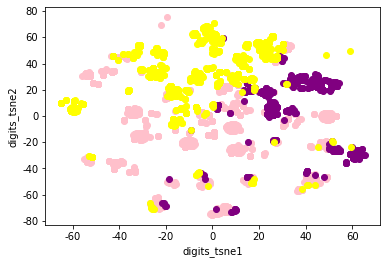

In [66]:
# target 별 분리
final_df_0 = final_df[final_df['cluster'] == 0]
final_df_1 = final_df[final_df['cluster'] == 1]
final_df_2 = final_df[final_df['cluster'] == 2]

# target 별 시각화
plt.scatter(final_df_0['digits_tsne1'], final_df_0['digits_tsne2'], color = 'pink')
plt.scatter(final_df_1['digits_tsne1'], final_df_1['digits_tsne2'], color = 'purple')
plt.scatter(final_df_2['digits_tsne1'], final_df_2['digits_tsne2'], color = 'yellow')

plt.xlabel('digits_tsne1')
plt.ylabel('digits_tsne2')
plt.show()

---

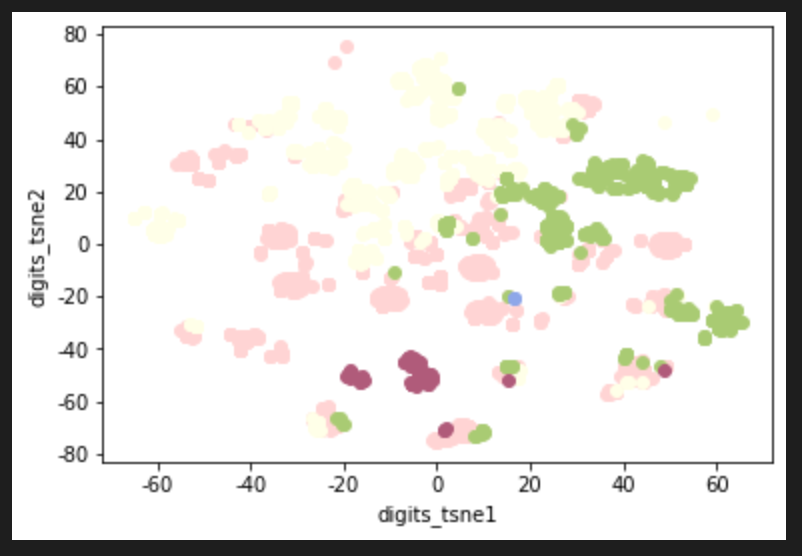

---